In [106]:
import pandas as pd

data = pd.read_csv("data.csv", sep=";")
data.columns = data.columns.str.strip()

data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [107]:
target_variable = 'Target'

data[target_variable] = data[target_variable].replace({'Graduate': 1, 'Dropout': 0, 'Enrolled': 0})

data.head()

C:\Users\AcerI5\AppData\Local\Temp\ipykernel_14860\1296490956.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[target_variable] = data[target_variable].replace({'Graduate': 1, 'Dropout': 0, 'Enrolled': 0})


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [108]:
X = data.drop(columns=[target_variable])

In [109]:
correlation_matrix = X.corr()

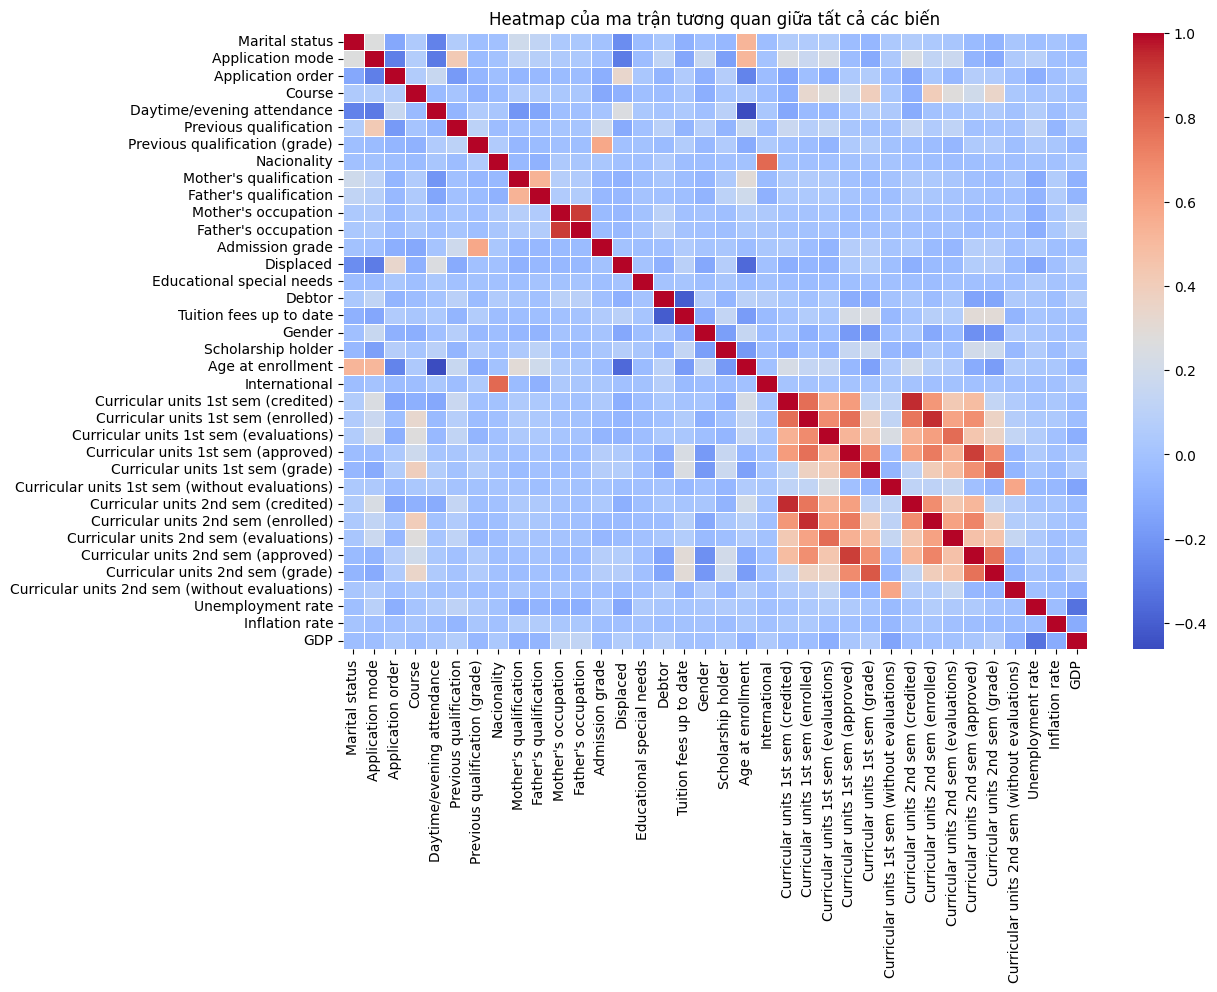

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap của ma trận tương quan giữa tất cả các biến")
plt.show()

In [111]:
threshold = 0.8

In [112]:
to_remove = {correlation_matrix.columns[i] for i in range(len(correlation_matrix.columns)) 
             for j in range(i) if abs(correlation_matrix.iloc[i, j]) > threshold}

In [113]:
print(f"Loại bỏ các biến có tương quan cao: {to_remove}")
X = X.drop(columns=to_remove)

Loại bỏ các biến có tương quan cao: {'Curricular units 2nd sem (grade)', "Father's occupation", 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (approved)'}


In [114]:
continuous_variables = ['Admission grade', 'GDP', 'Inflation rate', 'Previous qualification (grade)', 'Unemployment rate']
X[continuous_variables] = (X[continuous_variables] - X[continuous_variables].mean()) / X[continuous_variables].std()

In [115]:
import numpy as np

X_np, y_np = X.to_numpy(), data[target_variable].to_numpy().reshape(-1, 1)

In [116]:
split = int(0.8 * len(X_np))
X_train, X_test = X_np[:split], X_np[split:]
y_train, y_test = y_np[:split], y_np[split:]

In [117]:
from tqdm import tqdm

class LogisticRegression:
    def __init__(self, epoch: int = 1000, lr: float = 0.01) -> None:
        self.epoch = epoch
        self.lr = lr
        self.losses = []
        self.metrics = []
    
    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        return 1 / (1 + np.exp(-z))
    
    def loss_fn(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        return -(y * np.log(y_hat + 1e-9) + (1 - y) * np.log(1 - y_hat + 1e-9)).mean()

    def accuracy(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        return np.mean(y == (y_hat >= 0.5))
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        n, d = X.shape
        self.theta = np.zeros((d, 1))

        with tqdm(range(self.epoch), desc="Training") as pb:
            for _ in pb:
                y_hat = self.sigmoid(X @ self.theta)
                gradient = (1/n) * X.T @ (y_hat - y)
                self.theta -= self.lr * gradient

                loss = self.loss_fn(y, y_hat)
                acc = self.accuracy(y, y_hat)
                
                self.losses.append(loss)
                self.metrics.append(acc)
                pb.set_postfix(loss=f"{loss:.4f}", acc=f"{acc:.4f}")

    def predict(self, X: np.ndarray) -> np.ndarray:
        return (self.sigmoid(X @ self.theta) >= 0.5).astype(int)

In [118]:
model = LogisticRegression(epoch=580, lr=0.01)
model.fit(X_train, y_train)

Training:   0%|          | 0/580 [00:00<?, ?it/s, acc=0.5044, loss=10.2681]C:\Users\AcerI5\AppData\Local\Temp\ipykernel_14860\2431594095.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
Training: 100%|██████████| 580/580 [00:00<00:00, 774.39it/s, acc=0.5061, loss=10.2328]


In [119]:
y_pred = model.predict(X_test)

C:\Users\AcerI5\AppData\Local\Temp\ipykernel_14860\2431594095.py:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [120]:
test_acc = np.mean(y_pred == y_test)
print(f"Độ chính xác trên tập test: {test_acc:.4f}")

Độ chính xác trên tập test: 0.5209
